In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./ToN_IoT.zip")

In [3]:
from sklearn.model_selection import train_test_split

In [6]:
output = 'type'

In [7]:
df[output].unique()

array(['ransomware', 'ddos', 'injection', 'normal', 'password',
       'backdoor', 'dos', 'xss', 'scanning', 'mitm'], dtype=object)

In [8]:
df[output].value_counts()

type
normal        34955
backdoor      14102
dos           14094
password      14028
ransomware    13993
ddos          13981
injection     13975
xss           13974
scanning      13907
mitm            721
Name: count, dtype: int64

In [6]:
col_1 = ['DDoS']
col_2 = ['DoS', 'Reconnaissance', 'Normal', 'Theft']


In [7]:
df_1 = df[df[output].isin(col_1)] 
df_2 = df[df[output].isin(col_2)]

In [11]:
df_1[output].count(), df_2[output].count()

(1233140, 1114713)

In [9]:
df_1[output].value_counts()

category
DDoS    1233140
Name: count, dtype: int64

In [10]:
df_2[output].value_counts()

category
DoS               1056077
Reconnaissance      58294
Normal                290
Theft                  52
Name: count, dtype: int64

In [12]:
df_1.to_csv('./training-set_0.csv', index=False)

In [13]:
df_2.to_csv('./training-set_1.csv', index=False)

In [99]:
x = df
y = df[output]
x, _x, y, _y = train_test_split(x, y, random_state=189, test_size=0.20, stratify=y)

In [13]:
x

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
27872,172.17.0.7,52264,192.168.1.190,53,udp,dns,0.000717,0,178,SHR,...,0,0,-,-,-,-,-,-,0,normal
79008,192.168.1.36,38154,192.168.1.152,80,tcp,http,8.257008,1756,1022,S1,...,0,0,-,-,-,-,-,-,1,xss
42675,192.168.1.30,22,192.168.1.194,22,tcp,-,0.000524,0,0,RSTO,...,0,0,-,-,-,-,-,-,1,dos
3145,192.168.1.193,49235,192.168.1.33,4444,tcp,-,0.000000,0,0,OTH,...,0,0,-,-,-,-,-,-,1,ransomware
14641,192.168.1.32,50580,192.168.1.190,80,tcp,-,12.988027,0,2379,RSTO,...,0,0,-,-,-,-,-,-,1,xss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103480,192.168.1.195,1273,192.168.1.195,1273,tcp,-,0.202355,0,0,S0,...,0,0,-,-,-,-,-,-,0,normal
31602,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,OTH,...,0,0,-,-,-,-,-,-,0,normal
139411,192.168.1.31,33052,192.168.1.152,80,tcp,-,0.127870,242,3440,SF,...,0,0,-,-,-,-,-,-,1,injection
113643,192.168.1.193,49553,192.168.1.33,80,tcp,-,0.000097,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


In [14]:
_x

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
37984,192.168.1.193,49917,192.168.1.33,80,tcp,-,0.000104,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
81265,192.168.1.37,38339,192.168.1.193,445,tcp,-,0.000000,0,0,SH,...,0,0,-,-,-,-,-,-,1,ransomware
2992,192.168.1.30,54692,192.168.1.190,80,tcp,-,0.000432,0,0,S1,...,0,0,-,-,-,-,-,-,1,ddos
116846,192.168.1.30,60,192.168.1.194,60,tcp,-,0.000003,0,0,REJ,...,0,0,-,-,-,-,-,-,1,dos
69854,192.168.1.32,54776,192.168.1.133,10000,tcp,-,0.000000,0,0,S0,...,0,0,-,-,-,-,-,-,1,scanning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60208,192.168.1.30,36176,18.184.104.180,80,tcp,-,1.405710,527,12183,SF,...,0,0,-,-,-,-,-,-,1,injection
8632,192.168.1.31,57644,192.168.1.195,80,tcp,http,0.217740,238,1951,SF,...,0,0,-,-,-,-,-,-,1,injection
17701,192.168.1.152,51607,192.168.1.190,53,udp,dns,0.000034,130,0,S0,...,0,0,-,-,-,-,-,-,0,normal
45734,192.168.1.31,39476,192.168.1.190,80,tcp,http,0.005811,168,1919,SF,...,0,0,-,-,-,-,-,-,1,password


In [21]:
x.to_csv('./training-set_0.csv', index=False)

In [22]:
_x.to_csv('./training-set_1.csv', index=False)

In [17]:
x['type'].value_counts()

type
normal        33207
backdoor      13397
dos           13389
password      13327
ransomware    13293
ddos          13282
injection     13276
xss           13275
scanning      13212
mitm            685
Name: count, dtype: int64

In [63]:
values = df[output].value_counts()

for key, count in values.items():
    df_key = df[df[output] == key]
    
    

src_ip                    34955
src_port                  34955
dst_ip                    34955
dst_port                  34955
proto                     34955
service                   34955
duration                  34955
src_bytes                 34955
dst_bytes                 34955
conn_state                34955
missed_bytes              34955
src_pkts                  34955
src_ip_bytes              34955
dst_pkts                  34955
dst_ip_bytes              34955
dns_query                 34955
dns_qclass                34955
dns_qtype                 34955
dns_rcode                 34955
dns_AA                    34955
dns_RD                    34955
dns_RA                    34955
dns_rejected              34955
ssl_version               34955
ssl_cipher                34955
ssl_resumed               34955
ssl_established           34955
ssl_subject               34955
ssl_issuer                34955
http_trans_depth          34955
http_method               34955
http_uri

In [94]:
import psutil
import time
import matplotlib.pyplot as plt
from threading import Thread, Event

In [115]:
def monitor_resources(interval_sec, cpu_usage, ram_usage, stop_event):
    while not stop_event.is_set():
        cpu_percent = psutil.cpu_percent(interval=None)
        ram_amount = round(psutil.virtual_memory().used / (1024 ** 2))
        cpu_usage.append(cpu_percent)
        ram_usage.append(ram_amount)
        time.sleep(interval_sec)

def record_performance(interval_sec=1):
    cpu_usage = []
    ram_usage = []
    stop_event = Event()
    worker = Thread(target=monitor_resources, args=(interval_sec, cpu_usage, ram_usage, stop_event), daemon=True)
    worker.start()

    def get_result():
        stop_event.set()
        worker.join()
        return cpu_usage, ram_usage

    return get_result

In [183]:
def get_performance_report(record, path):
    cpu_usage, ram_usage = record()

    plt.figure()

    plt.subplot(211)
    plt.subplots_adjust(left=0.1)
    plt.plot(cpu_usage)
    plt.ylim(0,100)
    plt.yticks([0,20,40,60,80,100])
    plt.yticks([0,10,20,30,40,50,60,70,80,90,100], minor=True)
    plt.grid(which='both')
    plt.grid(axis='y', color = '#5A616E', linewidth = 0.5, alpha=0.8, which='major')
    plt.grid(axis='y', color = '#5A616E', linestyle = '--', linewidth = 0.5, alpha=0.5, which='minor')
    plt.grid(axis='x', alpha=0.0)
    plt.title('CPU Usage Over Time')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(ram_usage, color='orange')
    plt.grid(axis='y', color = '#5A616E', linestyle = '--', linewidth = 0.5)
    plt.title('RAM Usage Over Time')
    plt.legend()


    plt.subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)

    plt.xlabel("Time")
    plt.ylabel("Usage")
    
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.tight_layout()
    plt.savefig(path, dpi = 300, bbox_inches = 'tight')

In [184]:
from ctgan import CTGAN
ctgan = CTGAN(verbose=True, epochs=50)

In [100]:
train_data = _x

In [119]:
ctgan_data = train_data[1:1]
for val in train_data['type'].unique():
    val_data = train_data[train_data['type'] == val].drop_duplicates()
    if len(val_data) > 100:
        val_data = val_data.sample(n=100, random_state=42)
    ctgan_data = pd.concat([ctgan_data, val_data])

Gen. (-1.00) | Discrim. (0.18): 100%|██████████| 50/50 [00:09<00:00,  5.35it/s] 
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


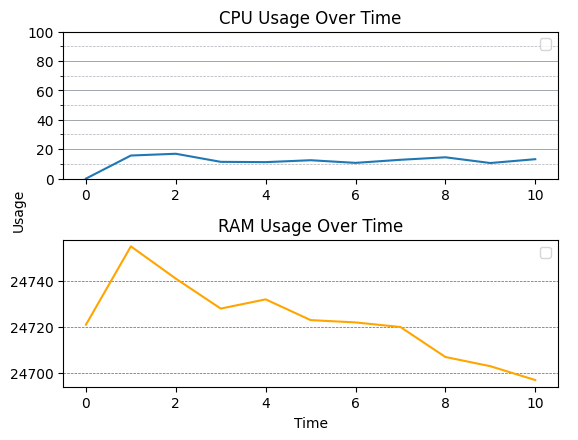

In [185]:
record = record_performance()
ctgan.fit(ctgan_data, ctgan_data.columns)
get_performance_report(record, 'performance.png')
